In [34]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from census import Census
from pprint import pprint
from scipy.stats import linregress
import gmaps


# Google API Key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

# Denver

In [2]:
target_coordinates = "39.7621, -104.8759"
target_search = "restaurant"
# Units in meters
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"


# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
denver_dataframe = pd.DataFrame(review_dict)
denver_dataframe['City']='Denver'
# denver_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


# Chicago

In [3]:
target_coordinates = "41.8373, -87.6862"
target_search = "restaurant"
# Units in meters
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status
    
    
} 
# establish dataframe
chicago_dataframe = pd.DataFrame(review_dict)
chicago_dataframe['City']='Chicago'
# chicago_dataframe

Restaurant has no price level. Skipping...


# New Orleans

In [4]:
target_coordinates = "30.0687, -89.9288"
target_search = "restaurant"
# Units in meters
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status    
} 
# establish dataframe
new_orleans_dataframe = pd.DataFrame(review_dict)
new_orleans_dataframe['City']='New Orleans'
# new_orleans_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


# Jacksonville

In [5]:
target_coordinates = "30.3322, -81.6749"
target_search = "restaurant"
# Units in meters
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()
    


name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status    
} 
# establish dataframe
jacksonville_dataframe = pd.DataFrame(review_dict)
jacksonville_dataframe['City']='Jacksonville'
# jacksonville_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


# Memphis

In [6]:
target_coordinates = "35.1046, -89.9773"
target_search = "restaurant"
# Units in meters
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status    
} 
# establish dataframe
memphis_dataframe = pd.DataFrame(review_dict)
memphis_dataframe['City']='Memphis'
# memphis_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


# Raleigh

In [7]:
target_coordinates = "35.8325, -78.6435"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status   
} 
# establish dataframe
raleigh_dataframe = pd.DataFrame(review_dict)
raleigh_dataframe['City']='Raleigh'
# raleigh_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


# Baltimore

In [8]:
target_coordinates = "39.3051, -76.6144"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status    
} 
# establish dataframe
baltimore_dataframe = pd.DataFrame(review_dict)
baltimore_dataframe['City']='Baltimore'
# baltimore_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


# St. Louis

In [9]:
target_coordinates = "38.6358, -90.2451"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status   
} 
# establish dataframe
st_louis_dataframe = pd.DataFrame(review_dict)
st_louis_dataframe['City']='St. Louis'
# st_louis_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


# Washington

In [10]:
target_coordinates = "38.9047, -77.0163"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"


# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {    
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status   
} 
# establish dataframe
washington_dataframe = pd.DataFrame(review_dict)
washington_dataframe['City']='Washington'
# washington_dataframe

Restaurant has no price level. Skipping...


# Providence

In [11]:
target_coordinates = "41.8230, -71.4187"
target_search = "restaurant"
# meters is the units
target_radius = 5000
target_type = "restaurant"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

name = []
rating = []
user_ratings_total = []
latitude = []
longitude = []
business_status = [] 
price_level = []
vicinity = []

for r in range(len(places_data["results"])):
    #try/except block
    try:
        business_status.append(places_data["results"][r]["business_status"])
        latitude.append(places_data["results"][r]["geometry"]["location"]["lat"])
        longitude.append(places_data["results"][r]["geometry"]["location"]["lng"])
        name.append(places_data["results"][r]["name"])
        rating.append(places_data["results"][r]["rating"])
        user_ratings_total.append(places_data["results"][r]["user_ratings_total"])
        vicinity.append(places_data["results"][r]["vicinity"])
        price_level.append(places_data["results"][r]["price_level"])
    except Exception:
    #if there is a 0 the restaurant has no price level ascoiated with it.
        print("Restaurant has no price level. Skipping...")
   
        price_level.append(0)

   
review_dict = {   
    "Restaurant":name,
    "Rating":rating,
    "price_level":price_level,
    "user_ratings_total":user_ratings_total,
    "latitude":latitude,
    "longitude":longitude,
    "vicinity":vicinity,
    "Business Status":business_status    
} 
# establish dataframe
providence_dataframe = pd.DataFrame(review_dict)
providence_dataframe['City']='Providence'
# providence_dataframe

Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...
Restaurant has no price level. Skipping...


In [12]:
# mergeing the dataframes
country_df = [denver_dataframe,
              chicago_dataframe, 
              new_orleans_dataframe, 
              jacksonville_dataframe, 
              memphis_dataframe, 
              raleigh_dataframe, 
              baltimore_dataframe, 
              st_louis_dataframe, 
              washington_dataframe, 
              providence_dataframe]
result = pd.concat(country_df)
display(result)

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Rocky Mountain Sudanese's restaurant,4.9,0,86,39.739778,-104.869816,"10180 E Colfax Ave, Aurora",CLOSED_TEMPORARILY,Denver
1,FIFTY300 Restaurant,3.8,0,21,39.770339,-104.903993,"3801 Quebec St, Denver",OPERATIONAL,Denver
2,Ted'z Place Restaurant and Lounge,4.5,2,814,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL,Denver
3,Sapp Bros Cafe,4.0,2,496,39.784892,-104.904588,"7120 E 49th Ave, Commerce City",OPERATIONAL,Denver
4,Café Mercato,4.4,2,372,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL,Denver
...,...,...,...,...,...,...,...,...,...
15,Massimo Ristorante,4.5,2,1172,41.823178,-71.422296,"134 Atwells Ave, Providence",OPERATIONAL,Providence
16,Pito Restaurant,4.5,1,419,41.796786,-71.413121,"1029 Broad St, Providence",OPERATIONAL,Providence
17,Mi Porcion Restaurant,4.6,0,21,41.823083,-71.450511,"319 Manton Ave, Providence",OPERATIONAL,Providence
18,Joe Marzilli's Old Canteen Italian Restaurant,4.6,2,516,41.823160,-71.421952,"120 Atwells Ave, Providence",OPERATIONAL,Providence


In [13]:
result =  result.reset_index(drop=True) 

In [14]:
# display(result)

In [15]:
# result.dtypes

In [16]:
final_df=result.loc[(result["Rating"]>4.0) & (result["user_ratings_total"]>250), :].reset_index(drop=True).dropna()

final_df

,Restaurant,Rating,price_level,user_ratings_total,latitude,longitude,vicinity,Business Status,City
0,Ted'z Place Restaurant and Lounge,4.5,2,814,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL,Denver
1,Café Mercato,4.4,2,372,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL,Denver
2,Phở 888,4.5,1,1222,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora",OPERATIONAL,Denver
3,Restaurante El Tamarindo,4.1,0,286,39.739806,-104.898394,"7700 E Colfax Ave, Denver",OPERATIONAL,Denver
4,El Chalate Restaurant,4.2,1,975,39.740360,-104.893437,"8119 E Colfax Ave, Denver",OPERATIONAL,Denver
...,...,...,...,...,...,...,...,...,...
135,north,4.4,2,389,41.823267,-71.415932,"122 Fountain St, Providence",OPERATIONAL,Providence
136,T's Restaurant Cranston,4.4,2,1159,41.782629,-71.444809,"1059 Park Ave, Cranston",OPERATIONAL,Providence
137,Massimo Ristorante,4.5,2,1172,41.823178,-71.422296,"134 Atwells Ave, Providence",OPERATIONAL,Providence
138,Pito Restaurant,4.5,1,419,41.796786,-71.413121,"1029 Broad St, Providence",OPERATIONAL,Providence


In [17]:
final_df=final_df[["City",
                   "Restaurant",
                   "Rating",
                   "user_ratings_total",
                   "price_level","latitude",
                   "longitude",
                   "vicinity","Business Status"]]

final_df.head()

,City,Restaurant,Rating,user_ratings_total,price_level,latitude,longitude,vicinity,Business Status
0,Denver,Ted'z Place Restaurant and Lounge,4.5,814,2,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City",OPERATIONAL
1,Denver,Café Mercato,4.4,372,2,39.719425,-104.896602,"7561 E Academy Blvd, Denver",OPERATIONAL
2,Denver,Phở 888,4.5,1222,1,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora",OPERATIONAL
3,Denver,Restaurante El Tamarindo,4.1,286,0,39.739806,-104.898394,"7700 E Colfax Ave, Denver",OPERATIONAL
4,Denver,El Chalate Restaurant,4.2,975,1,39.740360,-104.893437,"8119 E Colfax Ave, Denver",OPERATIONAL


In [18]:
final_df=final_df.drop('Business Status',1)
final_df.head()

,City,Restaurant,Rating,user_ratings_total,price_level,latitude,longitude,vicinity
0,Denver,Ted'z Place Restaurant and Lounge,4.5,814,2,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City"
1,Denver,Café Mercato,4.4,372,2,39.719425,-104.896602,"7561 E Academy Blvd, Denver"
2,Denver,Phở 888,4.5,1222,1,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora"
3,Denver,Restaurante El Tamarindo,4.1,286,0,39.739806,-104.898394,"7700 E Colfax Ave, Denver"
4,Denver,El Chalate Restaurant,4.2,975,1,39.740360,-104.893437,"8119 E Colfax Ave, Denver"


In [19]:
final_df=final_df.rename(columns={"user_ratings_total":"Number of Reviews",
                                  "price_level":"Price Level",
                                  "latitude":"Lat_Restaurant",
                                  "longitude":"Long_Restaurant",
                                  "vicinity":"Vicinity"})
final_df.head()

,City,Restaurant,Rating,Number of Reviews,Price Level,Lat_Restaurant,Long_Restaurant,Vicinity
0,Denver,Ted'z Place Restaurant and Lounge,4.5,814,2,39.791361,-104.926156,"5271 E 52nd Ave, Commerce City"
1,Denver,Café Mercato,4.4,372,2,39.719425,-104.896602,"7561 E Academy Blvd, Denver"
2,Denver,Phở 888,4.5,1222,1,39.724174,-104.821340,"Parking lot, 539 Sable Blvd, Aurora"
3,Denver,Restaurante El Tamarindo,4.1,286,0,39.739806,-104.898394,"7700 E Colfax Ave, Denver"
4,Denver,El Chalate Restaurant,4.2,975,1,39.740360,-104.893437,"8119 E Colfax Ave, Denver"


In [20]:
# Import csv file city_data_output.csv
output_csv_file = "us_cities_sample.csv"
# Create dataframe
us_cities = pd.read_csv(output_csv_file)
# View dataframe
us_cities

,City,State,Latitude,Longitude,Population
0,Chicago,IL,41.8373,-87.6862,8604203
1,Washington,DC,38.9047,-77.0163,5379184
2,Denver,CO,39.7621,-104.8759,2876625
3,Baltimore,MD,39.3051,-76.6144,2106068
4,St. Louis,MO,38.6358,-90.2451,2024074
5,Providence,RI,41.8230,-71.4187,1203230
6,Jacksonville,FL,30.3322,-81.6749,1181496
7,Memphis,TN,35.1046,-89.9773,1066967
8,Raleigh,NC,35.8325,-78.6435,1038738
9,New Orleans,LA,30.0687,-89.9288,1020886


In [21]:
# Combine the data into a single dataset. ****This one is important**** 
complete_df = pd.merge(us_cities, final_df, how="left", on=["City", "City"])
complete_df

,City,State,Latitude,Longitude,Population,Restaurant,Rating,Number of Reviews,Price Level,Lat_Restaurant,Long_Restaurant,Vicinity
0,Chicago,IL,41.8373,-87.6862,8604203,Red Barrel Restaurant,4.4,586,2,41.800116,-87.735133,"5214 S Archer Ave, Chicago"
1,Chicago,IL,41.8373,-87.6862,8604203,Bridgeport Restaurant,4.2,769,1,41.830638,-87.646313,"3500 S Halsted St, Chicago"
2,Chicago,IL,41.8373,-87.6862,8604203,The Village,4.5,3485,2,41.880538,-87.630205,"71 W Monroe St, Chicago"
3,Chicago,IL,41.8373,-87.6862,8604203,Palace Grill Restaurant,4.6,786,1,41.881654,-87.662523,"1408 W Madison St, Chicago"
4,Chicago,IL,41.8373,-87.6862,8604203,Rivers Restaurant,4.2,432,2,41.880834,-87.637123,"30 S Wacker Dr, Chicago"
...,...,...,...,...,...,...,...,...,...,...,...,...
135,New Orleans,LA,30.0687,-89.9288,1020886,Bullard Seafood and Grill,4.3,1160,1,30.048131,-89.962155,"7025 Bullard Ave, New Orleans"
136,New Orleans,LA,30.0687,-89.9288,1020886,Vucinovich's,4.7,264,1,30.030055,-89.927879,"4510 Michoud Blvd, New Orleans"
137,New Orleans,LA,30.0687,-89.9288,1020886,Burritos Grill Mexican Fresh Cuisine,4.4,332,0,30.038769,-89.976998,"7009 Read Blvd, New Orleans"
138,New Orleans,LA,30.0687,-89.9288,1020886,Tony's Super Cajun Seafood,4.1,367,1,30.041712,-89.956840,"5971 Bullard Ave, New Orleans"


In [35]:
# Create a map using state centroid coordinates to set markers
marker_locations = complete_df[['Latitude', 'Longitude']]
# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
# Create a map using state centroid coordinates to set markers,ZOOM IN
marker2_locations = complete_df[['Lat_Restaurant', 'Long_Restaurant']]
# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker2_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
complete_df.dtypes

City                  object
State                 object
Latitude             float64
Longitude            float64
Population             int64
Restaurant            object
Rating               float64
Number of Reviews      int64
Price Level            int64
Lat_Restaurant       float64
Long_Restaurant      float64
Vicinity              object
dtype: object

In [23]:
# Create a function to create Linear Regression plots

# x_values: first variable
# y_values: second variable
# regEQplotX: control the location where the linear regression equation appears on the plot x line
# regEQplotY: control the location where the linear regression equation appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel(f"{x_label}")    
    plt.ylabel(f"{y_label}")
    plt.grid()

The r-square is 0.0953034501626281
y = 0.0x + 933.85


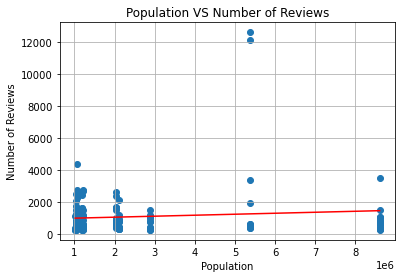

In [24]:
#set the data sets to compare
x_values = complete_df["Population"]
y_values = complete_df["Number of Reviews"]
#move the equations to where it can be seen
regEQplotX = 1
regEQplotY = 2000
#label the axis
x_label = "Population"
y_label = "Number of Reviews"
#title
plt.title(f"Population VS Number of Reviews")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

The r-square is -0.21816071190482753
y = -0.0x + 4.49


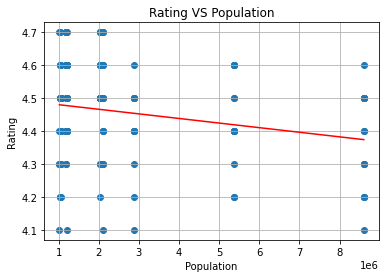

In [25]:
#set the data sets to compare
x_values = complete_df["Population"]
y_values = complete_df["Rating"]
#move the equations to where it can be seen
regEQplotX = 4
regEQplotY = 4
#label the axis
x_label = "Population"
y_label = "Rating"
#title
plt.title(f"Rating VS Population")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

The r-square is 0.0649212316926852
y = 0.0x + 1.78


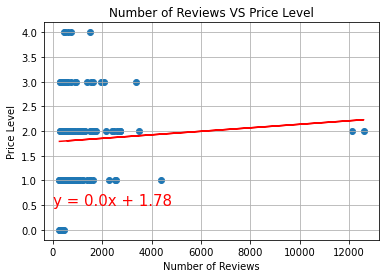

In [26]:
#set the data sets to compare
x_values = complete_df["Number of Reviews"]
y_values = complete_df["Price Level"]
#move the equations to where it can be seen
regEQplotX = 1
regEQplotY = .5
#label the axis
x_label = "Number of Reviews"
y_label = "Price Level"

#title
plt.title(f"Number of Reviews VS Price Level")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

The r-square is 0.2804060090381422
y = 1.55x + -5.07


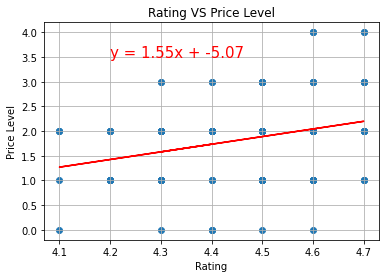

In [27]:
#set the data sets to compare
x_values = complete_df["Rating"]
y_values = complete_df["Price Level"]
#move the equations to where it can be seen
regEQplotX = 4.2
regEQplotY = 3.5
#label the axis
x_label = "Rating"
y_label = "Price Level"
#title
plt.title(f"Rating VS Price Level")

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()

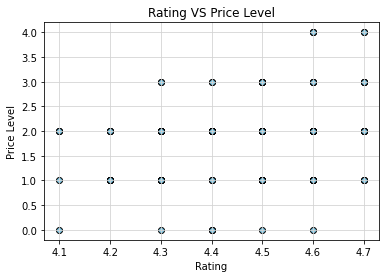

If the price level and rating is higher peoples assumption is that the food will be better


In [28]:
# how the scatter plot looks
plt.scatter(complete_df["Rating"],complete_df["Price Level"],edgecolors="black",facecolors="skyblue")
# title
plt.title("Rating VS Price Level")
# x-axis
plt.xlabel("Rating")
# y-axis
plt.ylabel("Price Level")
# how the grid looks
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save as a png to the figures folder
# plt.savefig("./figures/", bbox_inches='tight')
plt.show()
print("If the price level and rating is higher peoples assumption is that the food will be better")

when looking at the data we wanted to know what the most common review is given when someone is deciding a 4-5 review


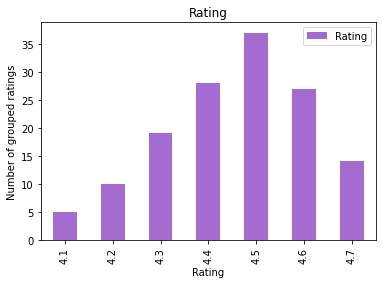

In [29]:
r_bar=complete_df.groupby("Rating")
# Create a dataframe counting
r_count = pd.DataFrame(r_bar["Rating"].count())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors 
r_chart = r_count.plot(kind="bar", title="Rating", color="#A36ACF")
# # Set the X-label and Y-label
r_chart.set_xlabel("Rating")

r_chart.set_ylabel("Number of grouped ratings")
print("when looking at the data we wanted to know what the most common review is given when someone is deciding a 4-5 review")

Text(0, 0.5, 'Number of grouped ratings')

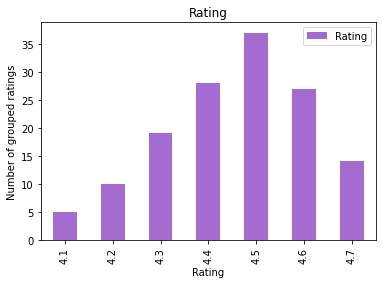

In [30]:
r_bar=complete_df.groupby("Rating")
# Create a dataframe
r_count = pd.DataFrame(r_bar["Rating"].count())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors 
r_chart = r_count.plot(kind="bar", title="Rating", color="#A36ACF")
# # Set the X-label and Y-label
r_chart.set_xlabel("Rating")

r_chart.set_ylabel("Number of grouped ratings")

Text(0, 0.5, 'Ratings')

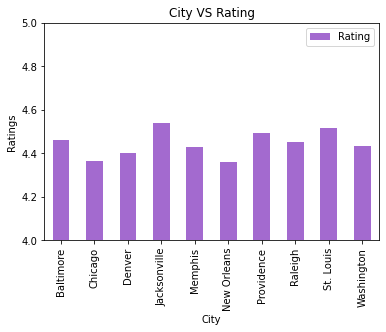

In [31]:
r_bar=complete_df.groupby("City")
# Create a dataframe mean
r_count = pd.DataFrame(r_bar["Rating"].mean())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors 
r_chart = r_count.plot(kind="bar", title="City VS Rating", color="#A36ACF",)



# Set the X-label and Y-label
r_chart.set_xlabel("City")
r_chart.set_ylim([4, 5])

r_chart.set_ylabel("Ratings")